# Julia does interactive numerics like Matlab

Interactive numerical and graphical tinkering, plus
  * familiar syntax, improved
  * rich numeric types: rational numbers, arbitrary-precision math
  * metaprogramming: transforming then evaluating chunks of code
  * Unicode variables and source text: $\alpha \; \beta \; \gamma \; \aleph \; x_j \; A_{ij} \; \oplus \; \ldots$
  * notebook interface with embedded graphics and LaTeX: $\text{erf}(x) = \pi^{-1/2} \int_{-x}^x e^{-t^2} dt$
  
  
## Solving Ax=b with backslash operator

In [2]:
# random matrix with normally distributed elements
A = randn(4,4)

4×4 Array{Float64,2}:
  1.57977   -0.0284909   0.0883973  -1.6861   
  1.12507   -0.738548    0.592905   -0.0494453
 -0.243772  -0.81507    -1.23417     1.94334  
 -0.763745  -0.237987    1.22853    -0.340448 

In [3]:
# familiar colon syntax: get 1st col of A
a₁ = A[:,1]

4-element Array{Float64,1}:
  1.57977 
  1.12507 
 -0.243772
 -0.763745

In [4]:
# set up Ax=b problem with known solution x
x = randn(4)
b = A*x

4-element Array{Float64,1}:
 -0.842261 
  0.0363522
  0.987869 
  0.534291 

In [5]:
# compute numerical solution x̂ of Ax=b using backslash operator
x̂ = A\b

4-element Array{Float64,1}:
 -0.531955 
 -0.916427 
 -0.0697371
  0.0129537

In [22]:
# compute error
@show norm(A*x̂ - b)

norm(A * x̂ - b) = 2.7194799110210365e-16


2.7194799110210365e-16

In [8]:
# what is machine precision for Float64 type?
eps(Float64)

2.220446049250313e-16

In [15]:
# compute condition number of A
cond(A)

9.510622984692173

In [20]:
U, σ, V = svd(A);
@show σ;

σ = [3.15231, 1.99652, 1.32968, 0.331452]


In [6]:
m = 32
λ = eigvals(randn(m,m)/sqrt(m))

32-element Array{Complex{Float64},1}:
   0.975049+0.36824im 
   0.975049-0.36824im 
  -0.370201+0.97752im 
  -0.370201-0.97752im 
   0.546149+0.783513im
   0.546149-0.783513im
  0.0416997+0.904293im
  0.0416997-0.904293im
  -0.803315+0.4621im  
  -0.803315-0.4621im  
   -0.24694+0.724944im
   -0.24694-0.724944im
  -0.760562+0.15964im 
           ⋮          
  -0.304846-0.459339im
   0.631438+0.408394im
   0.631438-0.408394im
   0.310531+0.466017im
   0.310531-0.466017im
   0.604046+0.0im     
   0.528621+0.0im     
   0.457018+0.0im     
   0.110231+0.38761im 
   0.110231-0.38761im 
  -0.427149+0.0im     
 -0.0450963+0.0im     

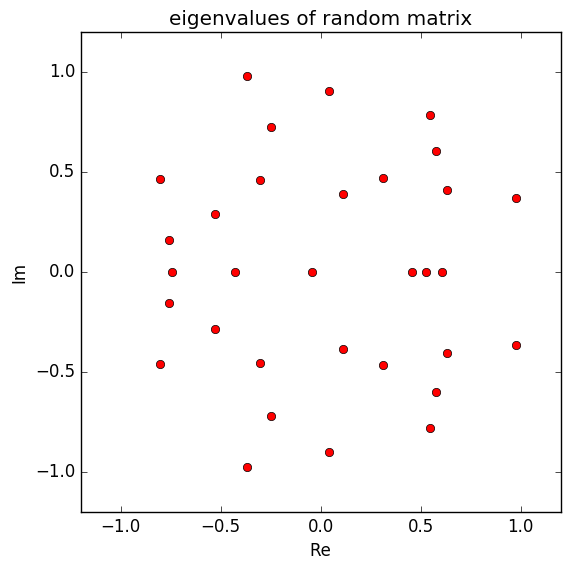

(-1.2, 1.2)

In [9]:
using PyPlot
plot(real(λ), imag(λ), "ro")
xlabel("Re")
ylabel("Im")
axis("square")
title("eigenvalues of random matrix")
xlim(-1.2,1.2)
ylim(-1.2,1.2)

## Integrate Lorenz equations

In [5]:
using ODE
using PyPlot

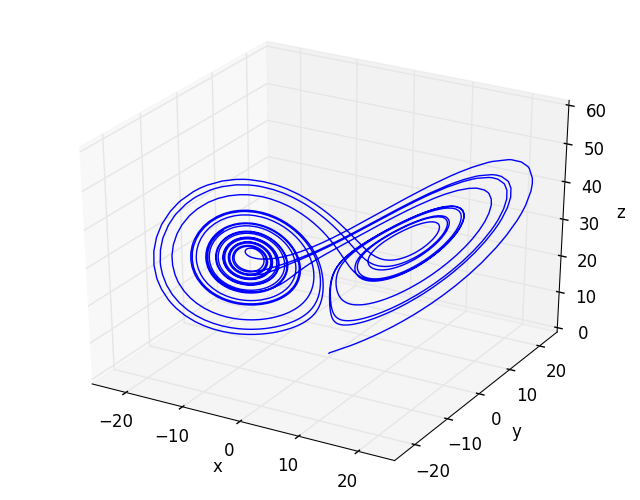

In [6]:
# define Lorenz equations ẋ = f(t,x)
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]); x[1]*x[2] - β*x[3]]
end

# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:21.0
x₀ = [0.1; 0.0; 0.0]
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Singular values of Hilbert matrix

In [8]:
using GenericSVD

In [1]:
# Form Hilbert matrix over rationals using list comprehension syntax
m = 10
A = [(1/(i+j)) for i=1:m, j=1:m]

10×10 Array{Float64,2}:
 0.5        0.333333   0.25       …  0.111111   0.1        0.0909091
 0.333333   0.25       0.2           0.1        0.0909091  0.0833333
 0.25       0.2        0.166667      0.0909091  0.0833333  0.0769231
 0.2        0.166667   0.142857      0.0833333  0.0769231  0.0714286
 0.166667   0.142857   0.125         0.0769231  0.0714286  0.0666667
 0.142857   0.125      0.111111   …  0.0714286  0.0666667  0.0625   
 0.125      0.111111   0.1           0.0666667  0.0625     0.0588235
 0.111111   0.1        0.0909091     0.0625     0.0588235  0.0555556
 0.1        0.0909091  0.0833333     0.0588235  0.0555556  0.0526316
 0.0909091  0.0833333  0.0769231     0.0555556  0.0526316  0.05     

In [2]:
cond(A)

6.23091645127766e13

In [3]:
σ = svdvals(A)

10-element Array{Float64,1}:
 1.28766    
 0.162737   
 0.0132489  
 0.000798037
 3.58996e-5 
 1.19264e-6 
 2.8445e-8  
 4.61135e-10
 4.55323e-12
 2.06657e-14

In [43]:
# Julia converted the Rationals to Float32s for the SVD.
# Those last few singular values look suspect. Try again with Float64
m = 10
A = [Float64(1//(i+j)) for i=1:m, j=1:m]

10×10 Array{Float64,2}:
 0.5        0.333333   0.25       …  0.111111   0.1        0.0909091
 0.333333   0.25       0.2           0.1        0.0909091  0.0833333
 0.25       0.2        0.166667      0.0909091  0.0833333  0.0769231
 0.2        0.166667   0.142857      0.0833333  0.0769231  0.0714286
 0.166667   0.142857   0.125         0.0769231  0.0714286  0.0666667
 0.142857   0.125      0.111111   …  0.0714286  0.0666667  0.0625   
 0.125      0.111111   0.1           0.0666667  0.0625     0.0588235
 0.111111   0.1        0.0909091     0.0625     0.0588235  0.0555556
 0.1        0.0909091  0.0833333     0.0588235  0.0555556  0.0526316
 0.0909091  0.0833333  0.0769231     0.0555556  0.0526316  0.05     

In [44]:
cond(A)

6.23091645127766e13

In [31]:
σ = svdvals(A)

10-element Array{Float64,1}:
 1.28766    
 0.162737   
 0.0132489  
 0.000798037
 3.58996e-5 
 1.19264e-6 
 2.8445e-8  
 4.61135e-10
 4.55323e-12
 2.06657e-14

In [59]:
# That's better. Now do a bigger Hilbert matrix with BigFloats! 
m = 32
A = [BigFloat(1//(i+j)) for i=1:m, j=1:m]
cond(A)

2.177988536256248982724176502736382176411066796736784337676765679838276034846115875889132968096962041471899701133801886250244066994528819515032748716353521936675639194934720913059213229596634182367327825499758401996715809184046783895705571880700524638429358753683189155499583796856425393527528024959649211221082e+47

In [60]:
σ = svdvals(A)

32-element Array{BigFloat,1}:
 1.621285348850195490535789906811725920847712216973467998238033279942275918566823324076618508167273668813465376017757454035593339895215995978528912381852198144702668022216401891288157439006369858076295644689155522082347870193741622369158153792684178791547800956914349998002909881922616375154782468610987982204544    
 3.456868707956789891613041213876354179908321698470618951390175507815876021222813292175036388857809172851867280153563762180868552731037798684453497689977377980476626404712761882691654024482994069376894964625143490599298387878513357004389746849501469219007562414330716581207144898324402041527589149163144858657038e-01
 5.407277491128296640365093840241177508410407990952070794308942113082198416773327134074757727031576213402299837046549430760559731621834899701453304571921990843974273327767676153210797642241181178203011640599921913332843127168291633337126969133396566809243894594744597095598846011983409081609436450642829116855481e-02
 7.2478924375058976

In [61]:
# got singular values from ranging from 1 to 10⁻⁴⁸!

## Fibonnaci function

In [20]:
fib(n) = n < 2 ? 1 : fib(n-1) + fbin(n-2)  # recursive function definition
for i = 0:10
    println("f($i) = $(f(i))")             # string interpolation
end

f(0) = 1
f(1) = 1
f(2) = 2
f(3) = 3
f(4) = 5
f(5) = 8
f(6) = 13
f(7) = 21
f(8) = 34
f(9) = 55
f(10) = 89


In [62]:
# anonymous function definition
f = x -> x^2 - 3

(::#47) (generic function with 1 method)

In [63]:
f(2)

1

In [66]:
f(2//3)

-23//9

In [67]:
f(2/3)

-2.5555555555555554

## Free, open, and internet-enabled

May the source be with you

In [69]:
@which A\b

\(A::AbstractArray{T,2} where T, B::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T) in Base.LinAlg at linalg/generic.jl:805

In [10]:
@which ode45(f, x₀, t)

ODE.ode45(fn, y0, tspan) at /home/gibson/.julia/v0.5/ODE/src/runge_kutta.jl:219

In [68]:
@which cond(A)

cond(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:911